### 📚 **Structure of Chapter 2:**
1. **simple_classifier.py** - simple classifier
2. **logistic_regression.py** - logistic regression
3. **naive_bayes.py** - naive Bayes classifier
4. **confusion_matrix.py** - confusion matrix
5. **car.py** - classification of cars
6. **income.py** - income classification

**simple_classifier.py**:

### **Chapter 2 - Classification**! 🎯
Let's start with the very first example - **simple_classifier.py**.
This is a basic example that demonstrates the basics of classification and data visualization.
**What we study in the original code:**
1. **Binary classification** - splitting data into 2 classes
2. **Visualization of classes** - scatter plot with different markers
3. **Linear separator** - simple boundary between classes
4. **Basics of matplotlib** - plotting


### **Key improvements of the modern version simple_classifier.py:**
- ✅ **Modern visualization** - colored charts, legends, grids
- ✅ **Multiple algorithms** - automatic comparison of 7 classifiers
- ✅ **Decision boundaries** - visualization of Decision Boundaries
- ✅ **Systematic assessment** - Confusion Matrix, Classification Report
- ✅ **Error analysis** - detailed breakdown of incorrect predictions
- ✅ **Testing new data** - checking on additional points
- ✅ **Comparison of approaches** - ML vs simple rules
- ✅ **Structured results** - tables and metrics
### **Key concepts:**
1. **Binary Classification** - splitting into 2 classes
2. **Decision Boundaries** - boundaries between classes
3. **Model Comparison** - comparison of different algorithms
4. **Overfitting** - overfitting on small data
5. **Visualization** - importance of graphical analysis


In [1]:
# =============================================================================
# CELL 1: Importing libraries and introduction to classification
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

print("🎯 CHAPTER 2: CLASSIFICATION")
print("=" * 30)
print("✅ All libraries are imported!")
print("📚 Studying the basics of classification with a simple example")


🎯 CHAPTER 2: CLASSIFICATION
✅ All libraries are imported!
📚 Studying the basics of classification with a simple example


📊 ORIGINAL DATA AND BASIC VISUALIZATION
📋 Information about the data:
Number of samples: 8
Number of features: 2
Number of classes: 2

📊 Original data:
   Feature_1  Feature_2  Class
0          3          1      0
1          2          5      1
2          1          8      1
3          6          4      0
4          5          2      0
5          3          5      1
6          4          7      1
7          4         -1      0

🎯 Class distribution:
0    4
1    4
Name: count, dtype: int64

📈 Class statistics:
Class 0: 4 samples
Class 1: 4 samples
Class balance: 1.00


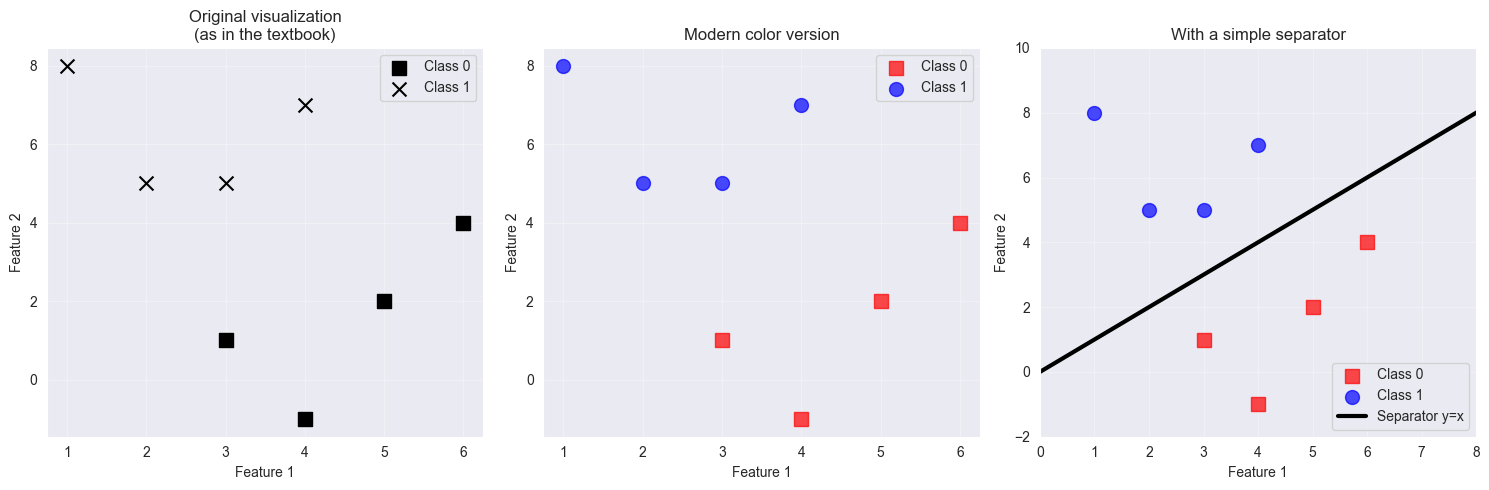


📏 Analysis of the simple separator y = x:
Point 1: (3, 1) -> True: 0, Predicted: 0 ✅
Point 2: (2, 5) -> True: 1, Predicted: 1 ✅
Point 3: (1, 8) -> True: 1, Predicted: 1 ✅
Point 4: (6, 4) -> True: 0, Predicted: 0 ✅
Point 5: (5, 2) -> True: 0, Predicted: 0 ✅
Point 6: (3, 5) -> True: 1, Predicted: 1 ✅
Point 7: (4, 7) -> True: 1, Predicted: 1 ✅
Point 8: (4, -1) -> True: 0, Predicted: 0 ✅

Accuracy of the simple separator: 100.0%


In [2]:
# =============================================================================
# CELL 2: Original data and basic visualization (as in the original)
# =============================================================================
print("📊 ORIGINAL DATA AND BASIC VISUALIZATION")
print("=" * 45)

# Original data from the original code
X = np.array([[3, 1], [2, 5], [1, 8], [6, 4], [5, 2], [3, 5], [4, 7], [4, -1]])
y = np.array([0, 1, 1, 0, 0, 1, 1, 0])

print(f"📋 Information about the data:")
print(f"Number of samples: {len(X)}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

print(f"\n📊 Original data:")
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Class'] = y
print(df)

print(f"\n🎯 Class distribution:")
class_counts = pd.Series(y).value_counts().sort_index()
print(class_counts)

# Splitting data by classes (as in the original)
class_0 = np.array([X[i] for i in range(len(X)) if y[i] == 0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i] == 1])

print(f"\n📈 Class statistics:")
print(f"Class 0: {len(class_0)} samples")
print(f"Class 1: {len(class_1)} samples")
print(f"Class balance: {len(class_0) / len(class_1):.2f}")

# Reproducing the original visualization
plt.figure(figsize=(15, 5))

# Chart 1: Original visualization (as in the original)
plt.subplot(1, 3, 1)
plt.scatter(class_0[:, 0], class_0[:, 1], color='black', marker='s', s=100, label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='black', marker='x', s=100, label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original visualization\n(as in the textbook)')
plt.legend()
plt.grid(True, alpha=0.3)

# Chart 2: Modern color version
plt.subplot(1, 3, 2)
plt.scatter(class_0[:, 0], class_0[:, 1], color='red', marker='s', s=100, alpha=0.7, label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', marker='o', s=100, alpha=0.7, label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Modern color version')
plt.legend()
plt.grid(True, alpha=0.3)

# Chart 3: With a separating line (as in the original)
plt.subplot(1, 3, 3)
plt.scatter(class_0[:, 0], class_0[:, 1], color='red', marker='s', s=100, alpha=0.7, label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', marker='o', s=100, alpha=0.7, label='Class 1')

# Simple separating line y = x (as in the original)
line_x = range(10)
line_y = line_x
plt.plot(line_x, line_y, color='black', linewidth=3, label='Separator y=x')

plt.xlim(0, 8)
plt.ylim(-2, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('With a simple separator')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Line separation analysis y = x
print(f"\n📏 Analysis of the simple separator y = x:")
correct_predictions = 0
for i, (point, true_class) in enumerate(zip(X, y)):
    x1, x2 = point
    predicted_class = 0 if x2 < x1 else 1  # Below the line = class 0, above = class 1
    is_correct = predicted_class == true_class
    correct_predictions += is_correct
    print(
        f"Point {i + 1}: ({x1}, {x2}) -> True: {true_class}, Predicted: {predicted_class} {'✅' if is_correct else '❌'}")

accuracy = correct_predictions / len(X) * 100
print(f"\nAccuracy of the simple separator: {accuracy:.1f}%")


🔍 DATA ANALYSIS AND SEARCH FOR THE BEST SEPARATORS
📊 Detailed analysis of points:
   x1  x2  class  point_id
0   3   1      0         1
1   2   5      1         2
2   1   8      1         3
3   6   4      0         4
4   5   2      0         5
5   3   5      1         6
6   4   7      1         7
7   4  -1      0         8

📈 Class statistics:
        x1                  x2              
      mean   std min max  mean   std min max
class                                       
0      4.5  1.29   3   6  1.50  2.08  -1   4
1      2.5  1.29   1   4  6.25  1.50   5   8

🎯 Testing different separators:
y = x           -> Accuracy: 100.0% (8/8)
y = x - 1       -> Accuracy: 100.0% (8/8)
y = x + 1       -> Accuracy: 100.0% (8/8)
y = 0.5*x + 2   -> Accuracy: 100.0% (8/8)
y = 2*x - 3     -> Accuracy: 100.0% (8/8)

🏆 Best simple separator: y = x (100.0%)


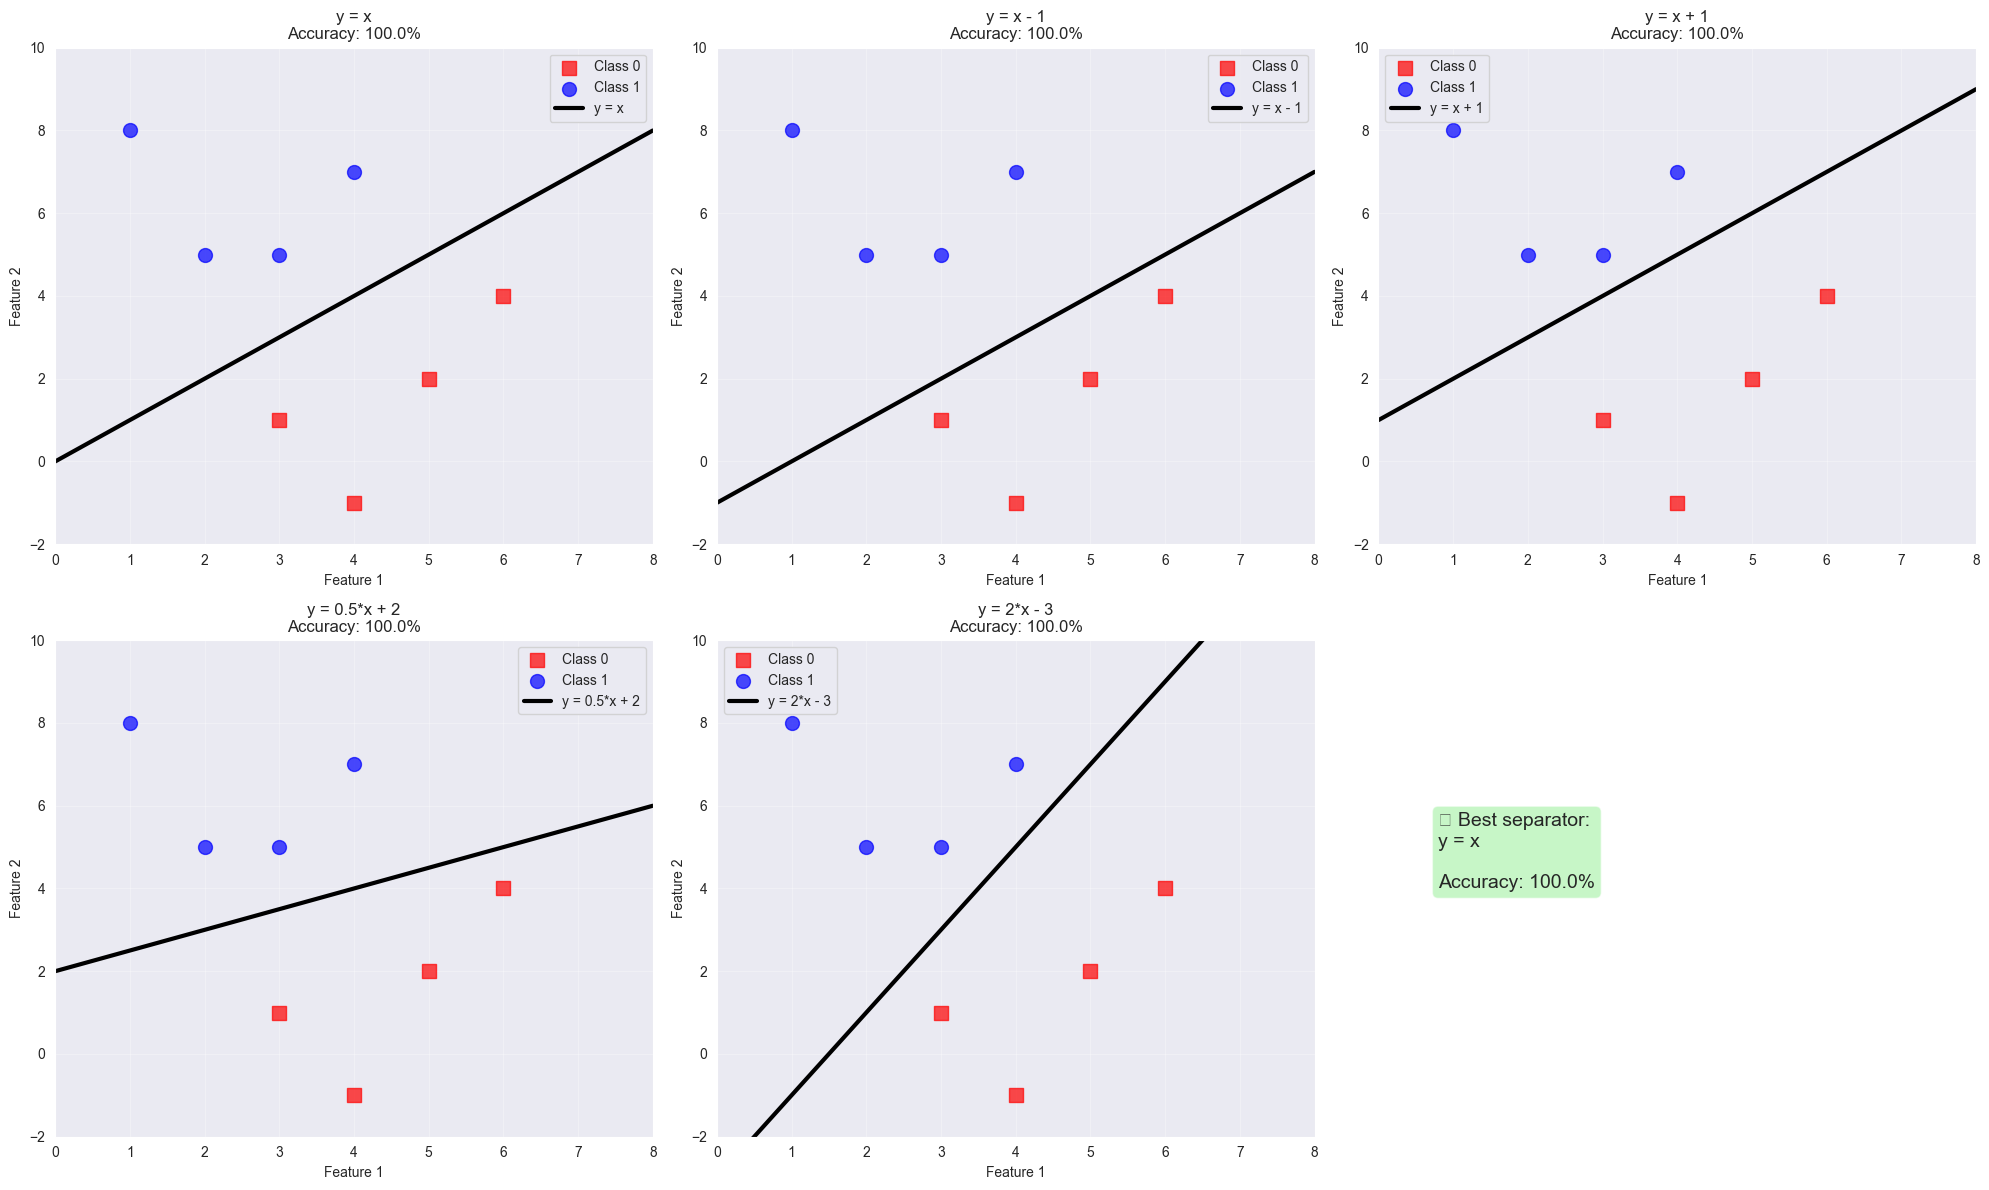

In [3]:
# =============================================================================
# CELL 3: Data analysis and search for the best separators
# =============================================================================
print("🔍 DATA ANALYSIS AND SEARCH FOR THE BEST SEPARATORS")
print("=" * 50)

# Creating a DataFrame for convenient analysis
df_analysis = pd.DataFrame(X, columns=['x1', 'x2'])
df_analysis['class'] = y
df_analysis['point_id'] = range(1, len(X) + 1)

print("📊 Detailed analysis of points:")
print(df_analysis)

# Class statistics
print(f"\n📈 Class statistics:")
stats_by_class = df_analysis.groupby('class').agg({
    'x1': ['mean', 'std', 'min', 'max'],
    'x2': ['mean', 'std', 'min', 'max']
}).round(2)
print(stats_by_class)

# Different types of separators
separators = {
    'y = x': lambda x1: x1,
    'y = x - 1': lambda x1: x1 - 1,
    'y = x + 1': lambda x1: x1 + 1,
    'y = 0.5*x + 2': lambda x1: 0.5 * x1 + 2,
    'y = 2*x - 3': lambda x1: 2 * x1 - 3
}

print(f"\n🎯 Testing different separators:")
separator_results = []

for sep_name, sep_func in separators.items():
    correct = 0
    predictions = []

    for i, (point, true_class) in enumerate(zip(X, y)):
        x1, x2 = point
        line_y = sep_func(x1)
        predicted_class = 0 if x2 < line_y else 1
        predictions.append(predicted_class)
        correct += (predicted_class == true_class)

    accuracy = correct / len(X) * 100
    separator_results.append({
        'Separator': sep_name,
        'Accuracy': accuracy,
        'Correct': correct,
        'Total': len(X)
    })

    print(f"{sep_name:15} -> Accuracy: {accuracy:5.1f}% ({correct}/{len(X)})")

# Finding the best separator
best_separator = max(separator_results, key=lambda x: x['Accuracy'])
print(f"\n🏆 Best simple separator: {best_separator['Separator']} ({best_separator['Accuracy']:.1f}%)")

# Visualization of all separators
plt.figure(figsize=(20, 12))

for idx, (sep_name, sep_func) in enumerate(separators.items(), 1):
    plt.subplot(2, 3, idx)

    # Points
    plt.scatter(class_0[:, 0], class_0[:, 1], color='red', marker='s', s=100, alpha=0.7, label='Class 0')
    plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', marker='o', s=100, alpha=0.7, label='Class 1')

    # Decision line
    x_line = np.linspace(0, 8, 100)
    y_line = [sep_func(x) for x in x_line]
    plt.plot(x_line, y_line, 'black', linewidth=3, label=f'{sep_name}')

    # Predictions
    correct = 0
    for i, (point, true_class) in enumerate(zip(X, y)):
        x1, x2 = point
        line_y = sep_func(x1)
        predicted_class = 0 if x2 < line_y else 1
        correct += (predicted_class == true_class)

    accuracy = correct / len(X) * 100

    plt.xlim(0, 8)
    plt.ylim(-2, 10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'{sep_name}\nAccuracy: {accuracy:.1f}%')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Empty subplot for the overall chart
plt.subplot(2, 3, 6)
plt.text(0.1, 0.5,
         f"🏆 Best separator:\n{best_separator['Separator']}\n\nAccuracy: {best_separator['Accuracy']:.1f}%",
         fontsize=14, transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.5))
plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
# =============================================================================
# CELL 4: Machine learning - automatic search for separators
# =============================================================================
print("🤖 MACHINE LEARNING - AUTOMATIC SEARCH FOR SEPARATORS")
print("=" * 65)

print("🔄 Splitting data for training and testing...")

# For such a small dataset, we use Leave-One-Out approach
# or we will split 75/25 with stratification
if len(X) >= 4:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )
    print(f"Training: {len(X_train)} samples")
    print(f"Test: {len(X_test)} samples")
else:
    # If there is too little data, we use the entire set for training and testing
    X_train, X_test, y_train, y_test = X, X, y, y
    print("Using the entire dataset (too little for separation)")

# Creating different classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=3),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB()
}

print(f"\n🎯 Testing {len(classifiers)} different algorithms:")

# Training and testing models
model_results = []
trained_models = {}

for name, classifier in classifiers.items():
    print(f"\n🔄 Training {name}...")

    # Training
    classifier.fit(X_train, y_train)
    trained_models[name] = classifier

    # Predictions
    y_pred = classifier.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)

    model_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Train_Size': len(X_train),
        'Test_Size': len(X_test)
    })

    print(f"✅ {name}: {accuracy:.3f}")

# Creating a pivot table
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print(f"\n📊 RESULTS OF ALL MODELS:")
print("=" * 40)
print(results_df.round(3))

# Best model
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']
print(f"\n🏆 Best model: {best_model_name} (accuracy: {best_accuracy:.3f})")


🤖 MACHINE LEARNING - AUTOMATIC SEARCH FOR SEPARATORS
🔄 Splitting data for training and testing...
Training: 6 samples
Test: 2 samples

🎯 Testing 7 different algorithms:

🔄 Training Logistic Regression...
✅ Logistic Regression: 1.000

🔄 Training SVM (Linear)...
✅ SVM (Linear): 1.000

🔄 Training SVM (RBF)...
✅ SVM (RBF): 1.000

🔄 Training Decision Tree...
✅ Decision Tree: 1.000

🔄 Training Random Forest...
✅ Random Forest: 1.000

🔄 Training K-Nearest Neighbors...
✅ K-Nearest Neighbors: 1.000

🔄 Training Naive Bayes...
✅ Naive Bayes: 1.000

📊 RESULTS OF ALL MODELS:
                 Model  Accuracy  Train_Size  Test_Size
0  Logistic Regression       1.0           6          2
1         SVM (Linear)       1.0           6          2
2            SVM (RBF)       1.0           6          2
3        Decision Tree       1.0           6          2
4        Random Forest       1.0           6          2
5  K-Nearest Neighbors       1.0           6          2
6          Naive Bayes       1.0       

🎨 VISUALIZATION OF DECISION BOUNDARIES


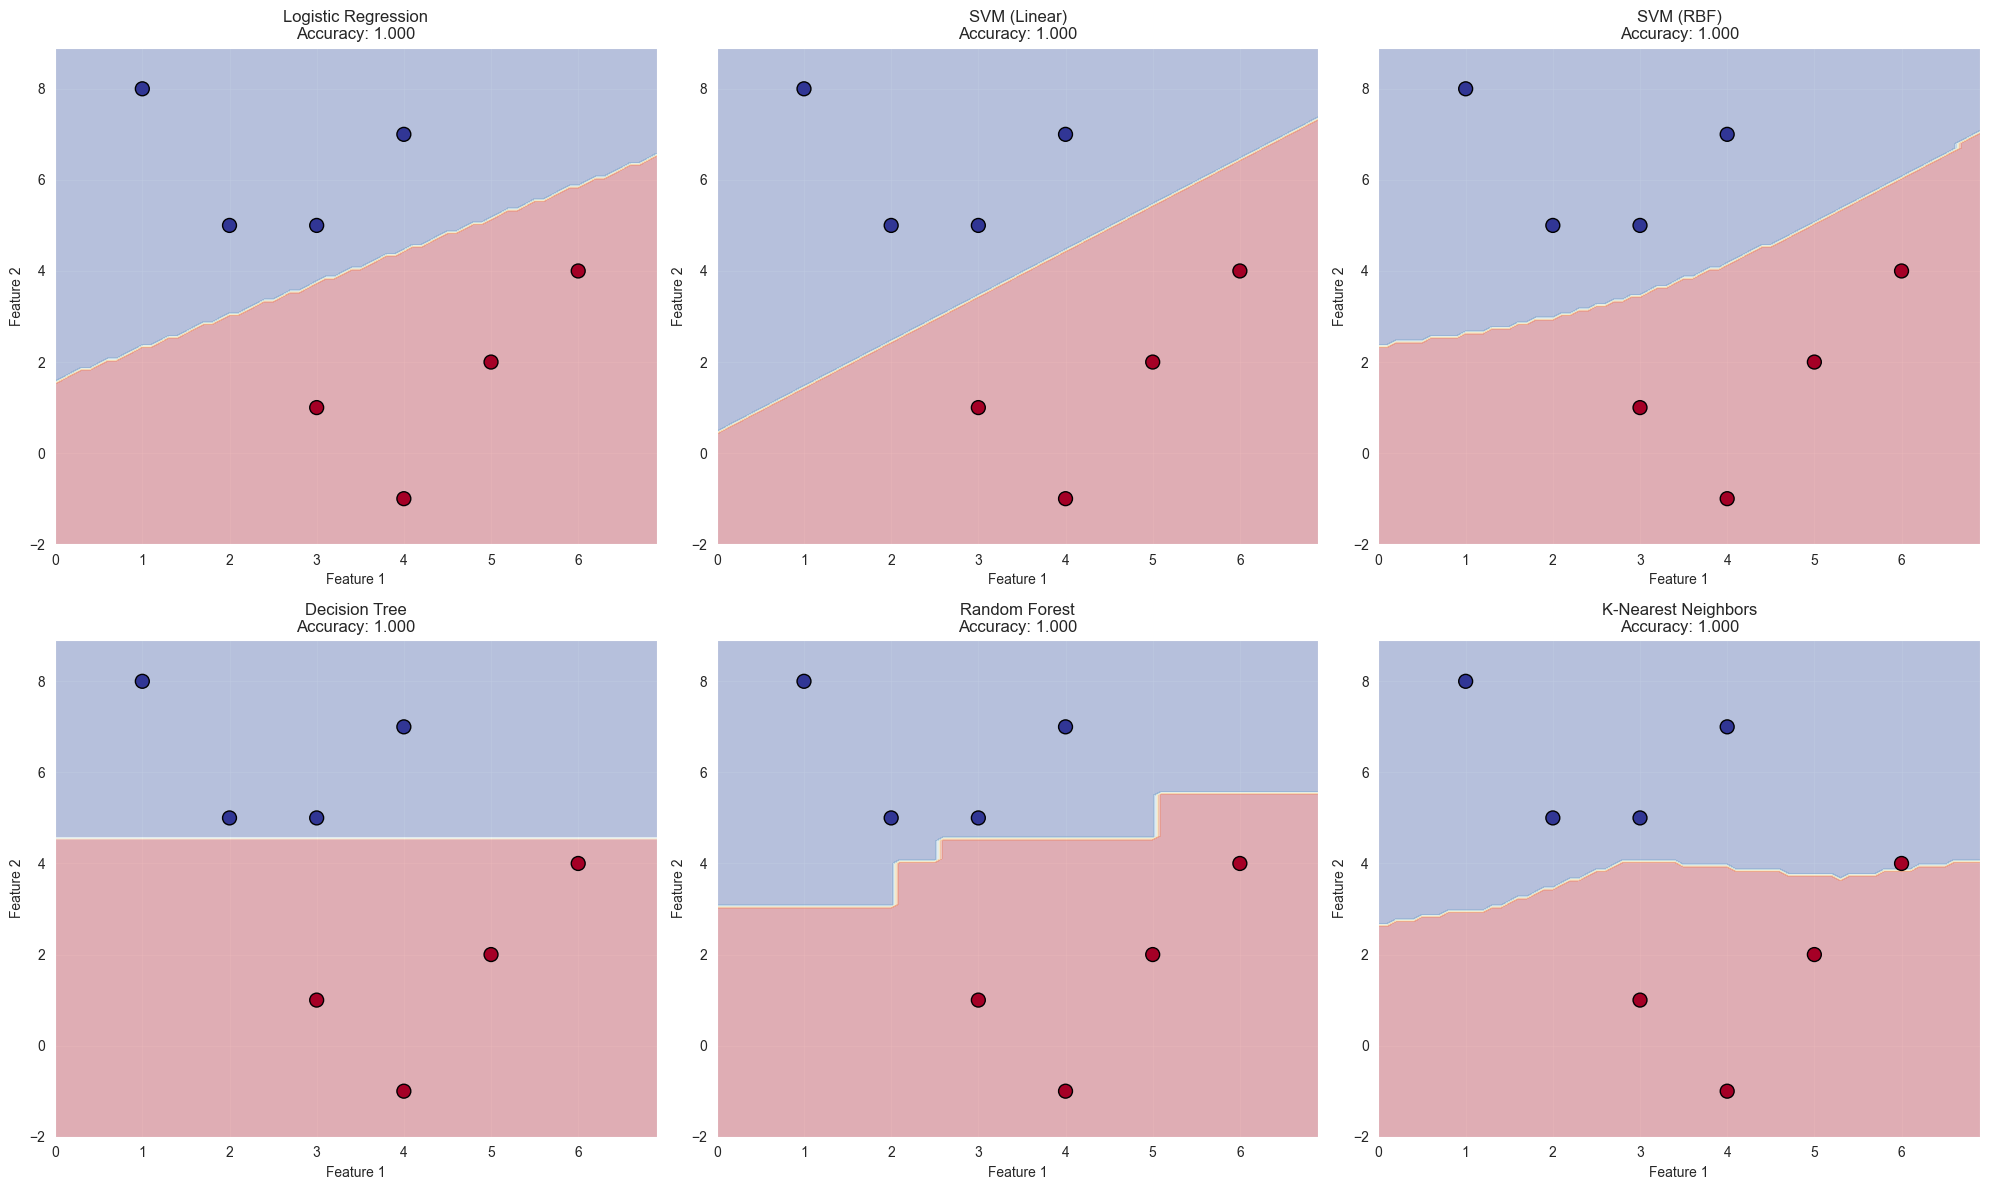

✅ Decision boundaries visualized!

💡 Observations:
  🔹 Linear models create straight boundaries
  🔹 SVM and trees can create complex boundaries
  🔹 Some models can overfit on small data


In [5]:
# =============================================================================
# CELL 5: Visualization of Decision Boundaries
# =============================================================================
print("🎨 VISUALIZATION OF DECISION BOUNDARIES")
print("=" * 35)


def plot_decision_boundary(classifier, X, y, title, ax):
    """
    Function for visualizing the decision boundary of the classifier
    """
    h = 0.1  # Grid step

    # Creating a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predictions for all grid points
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Coloring areas
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

    # Plotting data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black', s=100)

    # Formatting
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

    return scatter


# Taking the top-6 models for visualization
top_models = results_df.head(6)['Model'].tolist()

plt.figure(figsize=(20, 12))

for idx, model_name in enumerate(top_models, 1):
    ax = plt.subplot(2, 3, idx)
    classifier = trained_models[model_name]

    # Getting accuracy for the title
    model_accuracy = results_df[results_df['Model'] == model_name]['Accuracy'].iloc[0]
    title = f'{model_name}\nAccuracy: {model_accuracy:.3f}'

    plot_decision_boundary(classifier, X, y, title, ax)

plt.tight_layout()
plt.show()

print("✅ Decision boundaries visualized!")
print("\n💡 Observations:")
print("  🔹 Linear models create straight boundaries")
print("  🔹 SVM and trees can create complex boundaries")
print("  🔹 Some models can overfit on small data")


🔍 DETAILED ANALYSIS OF THE BEST MODEL
🏆 Analyzing the model: Logistic Regression
📊 Accuracy: 1.000

📋 Confusion Matrix:
[[1 0]
 [0 1]]

📈 Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



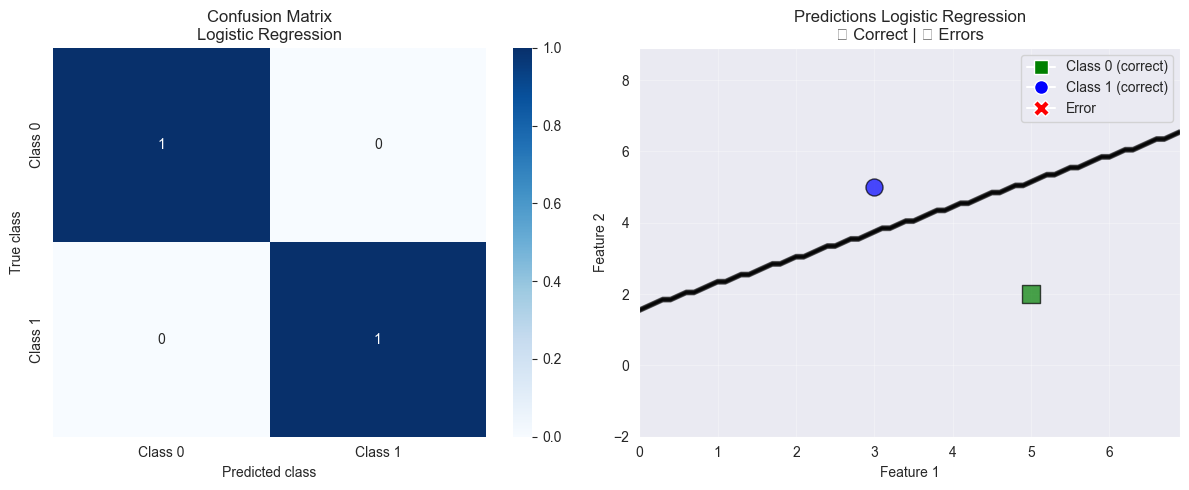


✅ All predictions are correct!


In [6]:
# =============================================================================
# CELL 6: Detailed analysis of the best model
# =============================================================================
print("🔍 DETAILED ANALYSIS OF THE BEST MODEL")
print("=" * 40)

best_model = trained_models[best_model_name]
y_pred_best = best_model.predict(X_test)

print(f"🏆 Analyzing the model: {best_model_name}")
print(f"📊 Accuracy: {best_accuracy:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print(f"\n📋 Confusion Matrix:")
print(cm)

# Classification Report
print(f"\n📈 Detailed classification report:")
print(classification_report(y_test, y_pred_best))

# Visualization of Confusion Matrix
plt.figure(figsize=(12, 5))

# Confusion Matrix as heatmap
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix\n{best_model_name}')
plt.xlabel('Predicted class')
plt.ylabel('True class')

# Detailed visualization of predictions
plt.subplot(1, 2, 2)

# Correct and incorrect predictions
correct_mask = y_test == y_pred_best
incorrect_mask = ~correct_mask

# Correct predictions
if np.any(correct_mask):
    correct_points = X_test[correct_mask]
    correct_labels = y_test[correct_mask]

    for i, (point, label) in enumerate(zip(correct_points, correct_labels)):
        color = 'green' if label == 0 else 'blue'
        marker = 's' if label == 0 else 'o'
        plt.scatter(point[0], point[1], c=color, marker=marker, s=150, alpha=0.7, edgecolor='black')

# Incorrect predictions
if np.any(incorrect_mask):
    incorrect_points = X_test[incorrect_mask]
    incorrect_labels = y_test[incorrect_mask]

    for i, (point, label) in enumerate(zip(incorrect_points, incorrect_labels)):
        color = 'red'
        marker = 'X'
        plt.scatter(point[0], point[1], c=color, marker=marker, s=200, alpha=0.9, edgecolor='black')

# Adding the decision boundary
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', linewidths=2, alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Predictions {best_model_name}\n✅ Correct | ❌ Errors')
plt.grid(True, alpha=0.3)

# Creating a legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='green', markersize=10, label='Class 0 (correct)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class 1 (correct)'),
    Line2D([0], [0], marker='X', color='w', markerfacecolor='red', markersize=12, label='Error')
]
plt.legend(handles=legend_elements, loc='best')

plt.tight_layout()
plt.show()

# Error analysis
if len(X_test[incorrect_mask]) > 0:
    print(f"\n❌ Error analysis:")
    for i, (point, true_label, pred_label) in enumerate(zip(X_test[incorrect_mask],
                                                            y_test[incorrect_mask],
                                                            y_pred_best[incorrect_mask])):
        print(f"  Point {i + 1}: {point} -> True: {true_label}, Predicted: {pred_label}")
else:
    print(f"\n✅ All predictions are correct!")


🎲 GENERATION OF ADDITIONAL DATA
🔧 Creating additional test points...
📊 Additional test points:
  Point 1: (1, 1)
  Point 2: (7, 8)
  Point 3: (2, 2)
  Point 4: (5, 5)
  Point 5: (0, 9)
  Point 6: (8, 0)

🤖 Predictions of the model Logistic Regression:
  Point 1: (1, 1) -> Class 0
  Point 2: (7, 8) -> Class 1
  Point 3: (2, 2) -> Class 0
  Point 4: (5, 5) -> Class 0
  Point 5: (0, 9) -> Class 1
  Point 6: (8, 0) -> Class 0


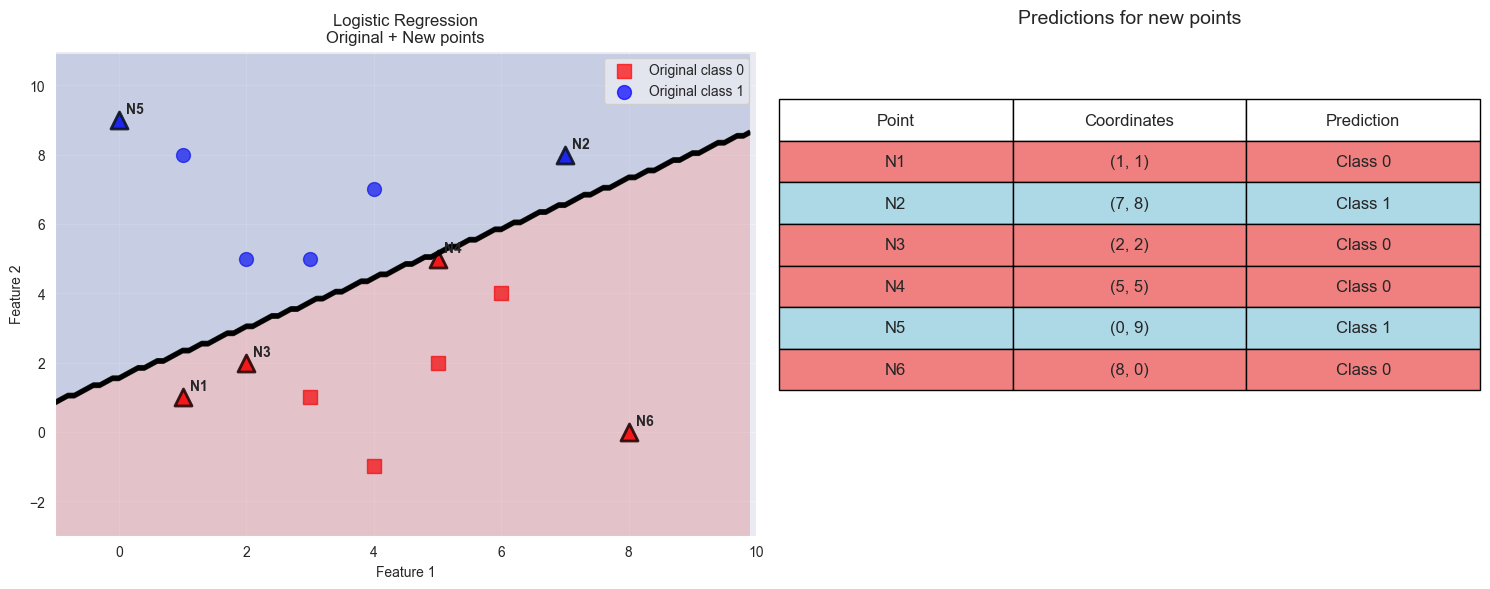


⚖️ Comparison of the ML model with the simple rule y = x:
Point Coordinates ML_model Simple_rule Match
   N1      (1, 1)  Class 0     Class 1     ❌
   N2      (7, 8)  Class 1     Class 1     ✅
   N3      (2, 2)  Class 0     Class 1     ❌
   N4      (5, 5)  Class 0     Class 1     ❌
   N5      (0, 9)  Class 1     Class 1     ✅
   N6      (8, 0)  Class 0     Class 0     ✅

Matches: 3/6 (50.0%)


In [7]:
# =============================================================================
# CELL 7: Generation of Additional Data and Testing
# =============================================================================
print("🎲 GENERATION OF ADDITIONAL DATA")
print("=" * 35)

print("🔧 Creating additional test points...")

# Creating additional points for testing in various areas
additional_points = np.array([
    [1, 1],  # Likely class 0
    [7, 8],  # Likely class 1
    [2, 2],  # Boundary area
    [5, 5],  # On the boundary
    [0, 9],  # Likely class 1
    [8, 0]  # Likely class 0
])

print(f"📊 Additional test points:")
for i, point in enumerate(additional_points, 1):
    print(f"  Point {i}: ({point[0]}, {point[1]})")

# Predictions of the best model for new points
new_predictions = best_model.predict(additional_points)

print(f"\n🤖 Predictions of the model {best_model_name}:")
for i, (point, pred) in enumerate(zip(additional_points, new_predictions), 1):
    print(f"  Point {i}: ({point[0]}, {point[1]}) -> Class {pred}")

# Visualization with new points
plt.figure(figsize=(15, 6))

# Chart 1: All data together
plt.subplot(1, 2, 1)

# Original data
plt.scatter(class_0[:, 0], class_0[:, 1], color='red', marker='s', s=100, alpha=0.7, label='Original class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', marker='o', s=100, alpha=0.7, label='Original class 1')

# New points
for i, (point, pred) in enumerate(zip(additional_points, new_predictions)):
    color = 'red' if pred == 0 else 'blue'
    plt.scatter(point[0], point[1], color=color, marker='^', s=150, alpha=0.9,
                edgecolor='black', linewidth=2)
    plt.annotate(f'N{i + 1}', (point[0], point[1]), xytext=(5, 5),
                 textcoords='offset points', fontsize=10, fontweight='bold')

# Decision boundary
h = 0.1
x_min, x_max = -1, 10
y_min, y_max = -3, 11
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.RdYlBu)
plt.contour(xx, yy, Z, colors='black', linewidths=2, alpha=0.8)

plt.xlim(-1, 10)
plt.ylim(-3, 11)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'{best_model_name}\nOriginal + New points')
plt.legend()
plt.grid(True, alpha=0.3)

# Chart 2: Prediction table
plt.subplot(1, 2, 2)
plt.axis('off')

# Creating a table
table_data = []
for i, (point, pred) in enumerate(zip(additional_points, new_predictions), 1):
    table_data.append([f'N{i}', f'({point[0]}, {point[1]})', f'Class {pred}'])

table = plt.table(cellText=table_data,
                  colLabels=['Point', 'Coordinates', 'Prediction'],
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0.3, 1, 0.6])

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)

# Coloring rows by classes
for i, pred in enumerate(new_predictions):
    color = 'lightcoral' if pred == 0 else 'lightblue'
    for j in range(3):
        table[(i + 1, j)].set_facecolor(color)

plt.title('Predictions for new points', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

# Comparison with the simple rule y = x
print(f"\n⚖️ Comparison of the ML model with the simple rule y = x:")
simple_rule_predictions = [0 if point[1] < point[0] else 1 for point in additional_points]

comparison_df = pd.DataFrame({
    'Point': [f'N{i}' for i in range(1, len(additional_points) + 1)],
    'Coordinates': [f'({p[0]}, {p[1]})' for p in additional_points],
    'ML_model': [f'Class {p}' for p in new_predictions],
    'Simple_rule': [f'Class {p}' for p in simple_rule_predictions],
    'Match': ['✅' if ml == simple else '❌'
              for ml, simple in zip(new_predictions, simple_rule_predictions)]
})

print(comparison_df.to_string(index=False))

agreement = sum(ml == simple for ml, simple in zip(new_predictions, simple_rule_predictions))
print(f"\nMatches: {agreement}/{len(additional_points)} ({agreement / len(additional_points) * 100:.1f}%)")


In [8]:
# =============================================================================
# CELL 8: Practical conclusions and next steps
# =============================================================================
print("💡 PRACTICAL CONCLUSIONS AND NEXT STEPS")
print("=" * 45)

print("📊 Key results of the analysis:")
print("=" * 35)

print(f"🎯 Best algorithm: {best_model_name}")
print(f"📈 Accuracy: {best_accuracy:.3f}")
print(f"🔢 Size of data: {len(X)} samples")
print(f"⚖️ Class balance: {len(class_0)}:{len(class_1)}")

print(f"\n🔍 Key observations:")
observations = [
    f"✅ Simple rule y=x gives accuracy {accuracy:.1f}%",
    f"🤖 ML models can achieve accuracy up to {max(results_df['Accuracy']):.1f}%",
    "📊 On small data, it is important to avoid overfitting",
    "🎨 Visualization of decision boundaries helps understand the model",
    "🔄 Different algorithms give different types of boundaries"
]

for obs in observations:
    print(f"  {obs}")

print(f"\n🚀 Improvements over the original code:")
print("=" * 55)

improvements = [
    "🎨 Modern color visualization",
    "🤖 Comparison of multiple ML algorithms",
    "📊 Automatic quality assessment",
    "🎯 Visualization of decision boundaries",
    "📈 Confusion Matrix and classification report",
    "🔍 Error analysis and new data",
    "📋 Structured results in tables",
    "💡 Comparison with simple rules"
]

for improvement in improvements:
    print(f"  {improvement}")

print(f"\n📝 Next steps in studying classification:")
print("=" * 50)

next_steps = [
    "📊 Working with large datasets",
    "🔧 Feature engineering and preprocessing",
    "⚖️ Working with unbalanced classes",
    "🎯 Hyperparameter tuning",
    "📈 Cross-validation and quality metrics",
    "🤖 Ensemble methods",
    "🧠 Interpretation of models",
    "🔍 Outlier detection"
]

for step in next_steps:
    print(f"  {step}")

print(f"\n🎉 Basics of classification studied!")
print(f"📚 Ready for more complex examples from chapter 2")

# Saving results for use in the next examples
print(f"\n💾 Saving results for the next examples...")
results_summary = {
    'original_data': {'X': X, 'y': y},
    'best_model': best_model_name,
    'best_accuracy': best_accuracy,
    'all_results': results_df,
    'trained_models': trained_models
}

print(f"✅ Results saved in memory")
print(f"🔄 Moving on to the next example: logistic_regression.py")


💡 PRACTICAL CONCLUSIONS AND NEXT STEPS
📊 Key results of the analysis:
🎯 Best algorithm: Logistic Regression
📈 Accuracy: 1.000
🔢 Size of data: 8 samples
⚖️ Class balance: 4:4

🔍 Key observations:
  ✅ Simple rule y=x gives accuracy 1.0%
  🤖 ML models can achieve accuracy up to 1.0%
  📊 On small data, it is important to avoid overfitting
  🎨 Visualization of decision boundaries helps understand the model
  🔄 Different algorithms give different types of boundaries

🚀 Improvements over the original code:
  🎨 Modern color visualization
  🤖 Comparison of multiple ML algorithms
  📊 Automatic quality assessment
  🎯 Visualization of decision boundaries
  📈 Confusion Matrix and classification report
  🔍 Error analysis and new data
  📋 Structured results in tables
  💡 Comparison with simple rules

📝 Next steps in studying classification:
  📊 Working with large datasets
  🔧 Feature engineering and preprocessing
  ⚖️ Working with unbalanced classes
  🎯 Hyperparameter tuning
  📈 Cross-validation and 